StatementMeta(, 32ee8f61-5af8-4bf3-8dff-ed141ef73ae3, 3, Finished, Available, Finished)

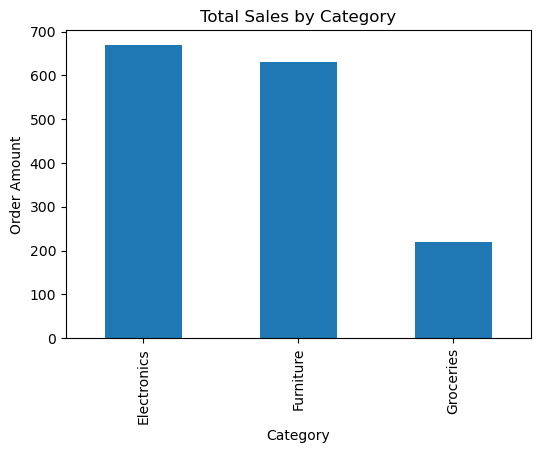

In [1]:
# Load dataset from Lakehouse (CSV file inside 'Files')
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("Files/orders.csv")

# Example: Custom visualization of total sales by category
import matplotlib.pyplot as plt

df_pd = df.toPandas()
category_sales = df_pd.groupby("Category")["OrderAmount"].sum()

category_sales.plot(kind="bar", figsize=(6,4), title="Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Order Amount")
plt.show()

In [2]:
from pyspark.sql import Window, functions as F

# Define window spec: partition by customer, order by date
w = Window.partitionBy("CustomerID").orderBy("OrderDate")

# Add running total column
df2 = df.withColumn("running_total", F.sum("OrderAmount").over(w))

# Save directly as a managed table in the Lakehouse
df2.write.format("delta").mode("overwrite").saveAsTable("orders_running_total")

# Verify the saved table
display(spark.sql("SELECT * FROM orders_running_total ORDER BY CustomerID, OrderDate"))

StatementMeta(, 32ee8f61-5af8-4bf3-8dff-ed141ef73ae3, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, d4d95783-3e2e-4ce3-b068-ecb75b126dc9)